In [1]:
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import cv2
from functions import clip, PCAreduce, plotSpectrum, meanSpectrum, getImage

In [2]:
files = [ "../Strawberry/Normalised/STR_B1_before-hit_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T184054_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_0mn_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T185621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_30min_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T193019_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_1hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T202126_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_3hr_VNIR_1800_SN00841_HSNR2_11998us_2020-08-02T214153_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_12h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T112003_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_24h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-03T181621_raw_rad_nn.hdr",
         "../Strawberry/Normalised/STR_B1_48h_VNIR_1800_SN00841_HSNR2_9998us_2020-08-04T152605_raw_rad_nn.hdr"
        ]


kSize = 7 # size of mean filter
#names = np.array(["before-hit", "0m","30m","1h" ,"3h","12h", "24h", "48h"])
times = np.array(["before-hit", "0h","0.5h","1h" ,"3h","12h", "24h", "48h"])


# number 1,2,3.. represent each a single unique strawberry ID, see strawberry_labeled.png for starwberry IDs

healthySamples = {1: [[5383,1293], [5236,1270], [5202,1350], [5339,1283], [5317,1248],[5043,1168],[4955,1293], [4917,1251]],
                  2: [[5497,516], [5290,536], [5268,611], [5397, 542], [5375,513], [5117,423], [5042,517], [5008,473]],
                  4: [[4198,322], [3966,306] , [5268,611], [5397, 542], [5375,513], [5117,423], [5042,517], [5008,473]]
                 }

bruisedSamples = {1: [[5392,1460],[5314,1462],[5288,1543],[5428,1474],[5409,1441],[5134,1353],[5036,1474],[4988,1440]],
                  2: [[5478,306], [5268,327], [5238,385], [5374,333], [5348,303], [5090, 216], [5010,309], [4976,273]],
                  4: [[4310,360], [4085,350], [4069,418] ,[4182,371], [4147,341], [3874,260], [3776,357], [3730,326]],
                  7: [[3069,1424], [2794,1452], [2763,1503], [2900,1469], [2877,1447], [2621,1310], [2540,1419], [2504,1366]],
                  9: [[1827,1299], [1585,1374], [1556,1423], [1694,1422], [1667,1401], [1411,1265], [1321,1375], [1277,1300]]
                 }


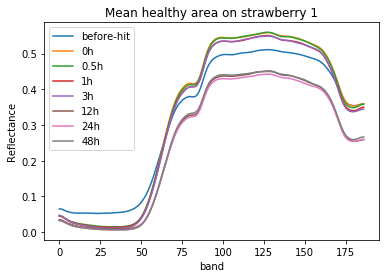

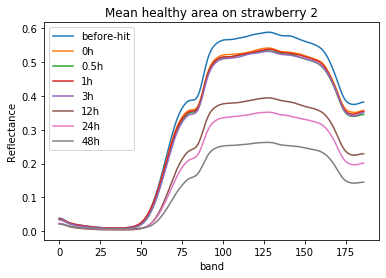

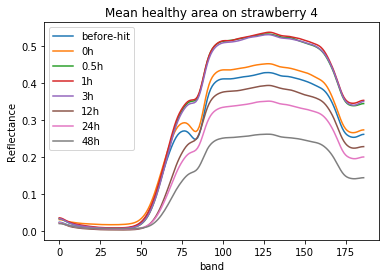

<Figure size 432x288 with 0 Axes>

In [3]:

healthySpectrum = []
for sid in healthySamples.keys():
    library_nonbruise = []

    for i in range(len(times)):
        subregion = sp.open_image(files[i]).read_subregion((healthySamples[sid][i][0] - kSize//2, healthySamples[sid][i][0] + kSize//2 +1), 
                                                           (healthySamples[sid][i][1] - kSize//2, healthySamples[sid][i][1] + kSize//2 +1))
        
        library_nonbruise.append([meanSpectrum(subregion), times[i]]) 
        
        if i == 1 and sid == 1:
            healthySpectrum.append(meanSpectrum(subregion))
            
        if i == 2 and sid == 2:
            healthySpectrum.append(meanSpectrum(subregion))
            
        if i == 4 and sid == 4:
            healthySpectrum.append(meanSpectrum(subregion))

    for spec in library_nonbruise:
        plotSpectrum(spec[0], xaxis="band", linelabel=spec[1])
    plt.title('Mean healthy area on strawberry %d' %sid)
    #plt.savefig("images/spectralLibary_bruised_region_%d.png" %sid)
    plt.figure()
    
    

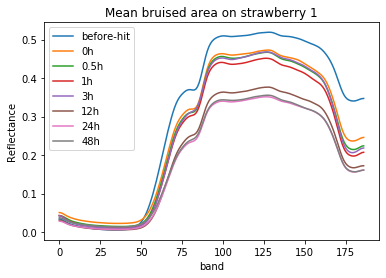

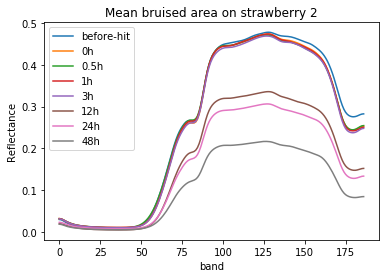

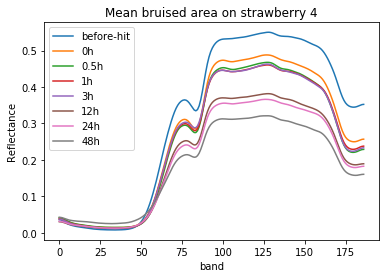

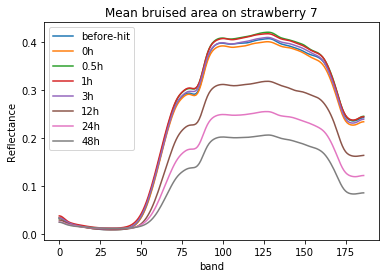

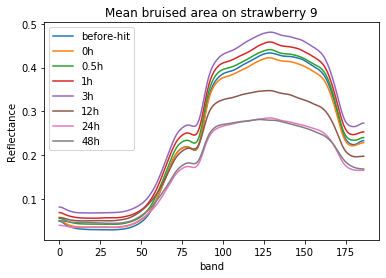

<Figure size 432x288 with 0 Axes>

In [4]:
bruisedSpectrum = []
spectra = []
for sid in bruisedSamples.keys():
    library_bruise = []
    #sid = 2 # strawberry ID

    for i in range(len(times)):
        subregion = sp.open_image(files[i]).read_subregion((bruisedSamples[sid][i][0] - kSize//2, bruisedSamples[sid][i][0] + kSize//2 +1), 
                                                           (bruisedSamples[sid][i][1] - kSize//2, bruisedSamples[sid][i][1] + kSize//2 +1))
        library_bruise.append([meanSpectrum(subregion), times[i]]) 

        if i == 1 and sid == 1:
            bruisedSpectrum.append(meanSpectrum(subregion))
           
        if i == 2 and sid == 2:
            bruisedSpectrum.append(meanSpectrum(subregion))
        if i == 4 and sid == 4:
            bruisedSpectrum.append(meanSpectrum(subregion))

    for spec in library_bruise:
        plotSpectrum(spec[0], xaxis="band", linelabel=spec[1])
    plt.title('Mean bruised area on strawberry %d' %sid)
    #plt.savefig("spectralLibary_bruise_region.png")
    plt.figure()


(array([7]),)


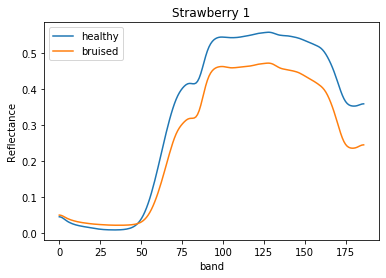

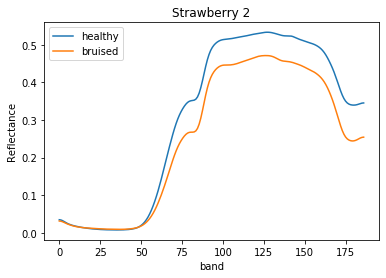

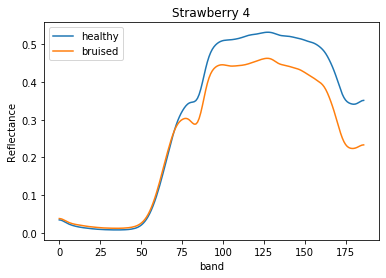

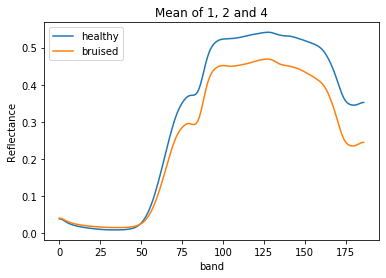

<Figure size 432x288 with 0 Axes>

In [5]:
meanspec = np.array( [np.array(healthySpectrum).sum(axis=0)/len(healthySpectrum) , np.array(bruisedSpectrum).sum(axis=0)/len(bruisedSpectrum) ]  ) 

meanspec = np.array(meanspec)
#print(meanspec[0])

plotSpectrum(healthySpectrum[0], xaxis="band", linelabel="healthy")
plotSpectrum(bruisedSpectrum[0], xaxis="band", linelabel="bruised")
plt.title("Strawberry 1")
plt.figure()
    

plotSpectrum(healthySpectrum[1], xaxis="band", linelabel="healthy")
plotSpectrum(bruisedSpectrum[1], xaxis="band", linelabel="bruised")
plt.title("Strawberry 2")
plt.figure()

plotSpectrum(healthySpectrum[2], xaxis="band", linelabel="healthy")
plotSpectrum(bruisedSpectrum[2], xaxis="band", linelabel="bruised")
plt.title("Strawberry 4")
plt.figure()


plotSpectrum(meanspec[0], xaxis="band", linelabel="healthy")
plotSpectrum(meanspec[1], xaxis="band", linelabel="bruised")
plt.title("Mean of 1, 2 and 4")
plt.figure()



print(np.where(bruisedSpectrum[2][75:100]==np.min(bruisedSpectrum[2][75:100])))

No handles with labels found to put in legend.


[106]


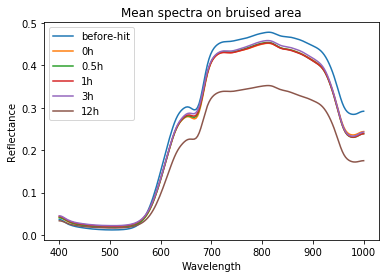

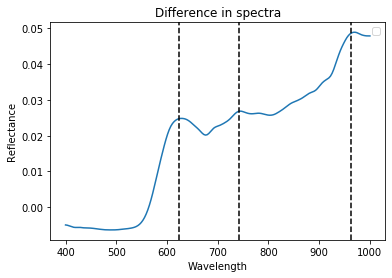

<Figure size 432x288 with 0 Axes>

In [6]:
mean_spectra = []
bands = 186
x = np.linspace(400,1000,bands)


# 1,2,3,4 corrosponding to each of the time samples, Asending timer order

nm = [0,1,2,3,4,5]
for i in nm:
    library_bruise = []
    for sid in bruisedSamples.keys():

        subregion = sp.open_image(files[i]).read_subregion((bruisedSamples[sid][i][0] - kSize//2, bruisedSamples[sid][i][0] + kSize//2 +1), 
                                                           (bruisedSamples[sid][i][1] - kSize//2, bruisedSamples[sid][i][1] + kSize//2 +1))
        library_bruise.append(meanSpectrum(subregion)) 
        
    mean_spectra.append(np.array(library_bruise).mean(axis=0))

    plt.plot(x,mean_spectra[-1], label=times[i] )


plt.legend()
plt.title("Mean spectra on bruised area")
plt.ylabel("Reflectance")
plt.xlabel("Wavelength")
#plt.savefig("images/spectralLibary_bruise_region_mean.png")
plt.figure()

plt.plot(x, mean_spectra[0]-mean_spectra[1])
plt.axvline(x=624, color="black", linestyle='--')
plt.axvline(x=741, color="black", linestyle='--')
plt.axvline(x=963, color="black", linestyle='--')

plt.title("Difference in spectra")
plt.ylabel("Reflectance")
plt.xlabel("Wavelength")
plt.legend()
#plt.savefig("images/spectralLibary_difference.png")
plt.figure()
mean = mean_spectra[0]-mean_spectra[1]
print(np.where(mean[:125] == np.max(mean[:125]))[0])
